


# Project: FBI Firearm Background Check Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
# Introduction

For this project, I will use the FBI NCIS Firearm Background Check and US Census data sets to explore the following questions:
<br>
<ul>
    <li> Which states had the highest and lowest rates of firearm background checks per capita?</li>
    <br>
    <li> Which state has had the highest growth in gun background checks per capita?</li>
    <br>
    <li> Do states with more restrictive gun laws have lower background checks per capita?</li>
    <br>
    
As the census data is given for the years 2010 and 2016, I will use these dates for my analysis.


In [205]:
# Importing packages
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Data
df1 = pd.read_csv('/Users/lanapalmer/jupyter/FBI_Gun_Data/us_census_data.csv')
df2 = pd.read_csv('/Users/lanapalmer/jupyter/FBI_Gun_Data/gun_data.csv')


<a id='wrangling'></a>
# Data Wrangling

### General Properties: US Census Data

In [206]:
#setting column width
pd.set_option('max_colwidth', 2000)

In [207]:
#Initial data exploration - Head
df1.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2016)",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, (V2016)",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [208]:
#Initial data exploration - Tail
df1.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half unit of measure shown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> The US Census Data file includes the following data for each state: 
<ul>
<li>Population estimate, as of July 1, 2016</li>
<li>Population estimate, as of April 1, 2010</a></li>
<li>Population percentage change, between April 1, 2010 and July 1, 2016 </a></li>
<li>Population census: April 1, 2010</li>
</ul>

> Followed by demographic data, including:
<ul>
<li>Percentage of people under 5, under 18, and over 65</li>
<li>Percentage of females</li>
<li>Percentage of race, including: White, Black or African American, Hispanic, and two or more races </li>
<li>Percentage of those without health insurance</li>
<li>Percentage of those with an undergraduate degree or highter</li>
<li>Percentage in civilian labor force</li>
<li>Percentage living in poverty</li>
<li>Per capita income</li>
<li>Number of veterans</li>
<li>Total employment</li>
</ul>

### General Properties: FBI NICS Firearm Background Check Data

In [209]:
df2.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


> The FBI NCIS Firearm Background Check Data is available <a href="https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view">at this link as a PDF.</a>
It is important to note that the data is a record of background checks, rather than actual gun sales, and as quoted in the original FBI pdf, <i> "based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale"</i> (pg. 1)


> The data file includes the number of background checks per month per state. The permit, permit_recheck, handgun and long_gun, other, and multiple columns represent background checks for officially-licensed Federal Firearms Licensee (FFL) or criminal justice/law enforcement agency prior to the issuance of a firearm-related permit or transfer.

> Other types of transactions are:
<ul>
 <li>Pre-Pawn—background checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm</li>
    <br>
    <li>Redemption—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop</li> 
    <br>
    <li>Returned/Disposition—background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited</li>
    <br>
    <li>Rentals—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business</li>
    <br>
    <li>Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL</li>
    <br>
    <li>Return to Seller-Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL. </li>
    
</ul>
(pg. 1).

### Data Cleaning: US Census Data

> It appears that row 64 contains a 'FIPS Code', and rows 65 - 85 contain coded footnotes on the data. I have decided to drop these rows, as well as the 'Fact Note' column for the purposes of this analysis.

In [210]:
df1.tail(22)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),Includes persons reporting only one race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
#Removing "Fact Note" Column
df1.drop(['Fact Note'], axis=1, inplace= True) 

In [212]:
#Dropping rows 64 to 84
df1.drop(df1.index[64:85], inplace= True)

In [213]:
#Transpose rows and columns so that it matches the NCIS data set.
df1 = df1.T

In [214]:
#Visual Check
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"


In [215]:
#Checking Data Type of each column
df1.dtypes

0     object
1     object
2     object
3     object
4     object
       ...  
59    object
60    object
61    object
62    object
63    object
Length: 64, dtype: object

> As the above shows, I will need to convert the data from string type into integer type. I'm interested in:
<ul>
    <li>Column [0] - Population Estimate, July 1, 2016</li>
    <br>
        <li>Column [3] - Population Census, April 1, 2010</li>
    </ul>

In [216]:
#Remove commas from strings in column 0
df1[0] = df1[0].str.replace(',', '')

In [217]:
#Extracting integers from strings
df1[0] = df1[0].str.extract('(\d+)').astype(int)

In [218]:
#Checking that type is now integer
df1.dtypes

0      int64
1     object
2     object
3     object
4     object
       ...  
59    object
60    object
61    object
62    object
63    object
Length: 64, dtype: object

In [219]:
#Remove commas from strings in column 3
df1[3] = df1[3].str.replace(',', '')

In [220]:
#Extracting integers from strings
df1[3] = df1[3].str.extract('(\d+)').astype(int)

In [221]:
#Checking that type is now integer
df1.dtypes

0      int64
1     object
2     object
3      int64
4     object
       ...  
59    object
60    object
61    object
62    object
63    object
Length: 64, dtype: object

> As my initial interest is in the population data for 2010 and 2016, I will make a new data frame that includes only this data.

In [222]:
#Creating copy of US Census data, as df3
df3 = df1.copy()

In [223]:
#Dropping all columns from column 4:63
df3.drop(df3.columns[4:], axis=1, inplace=True)

In [224]:
#Dropping columns 2,3
df3.drop(df3.columns[1:3], axis=1, inplace=True)

In [225]:
#Visual check of df3
df3.head()

,0,3
Fact,1,1
Alabama,4863300,4779736
Alaska,741894,710231
Arizona,6931071,6392017
Arkansas,2988248,2915918


In [226]:
#Renaming Columns
df3.columns = ['Population estimates, July 1, 2016', 'Population, Census, April 1, 2010'] 

In [227]:
#Dropping 'Fact' row
df3.drop(['Fact'], inplace=True)

In [228]:
#Visual Check
df3.head()

,"Population estimates, July 1, 2016","Population, Census, April 1, 2010"
Alabama,4863300,4779736
Alaska,741894,710231
Arizona,6931071,6392017
Arkansas,2988248,2915918
California,39250017,37253956


### Data Cleaning: FBI NCIS Firearm Background Check data

> As I've decided to focus on the years provided in the US Census data (2010 and 2016), my first task is to create a new dataframe containing the annual total for each state for these years.

In [229]:
#Visual Check of Head
df2.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [230]:
#Visual Check of Tail
df2.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [231]:
#Checking data for the year 2016
df2[df2.month.str.contains('2016',case=True) & (df2.permit == 0)]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
506,2016-12,Guam,0.0,0.0,105.0,51.0,8.0,8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172
516,2016-12,Mariana Islands,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
527,2016-12,New Jersey,0.0,0.0,5394.0,4979.0,204.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10577
533,2016-12,Oklahoma,0.0,0.0,17990.0,19418.0,1126.0,1060,0.0,15.0,...,0.0,0.0,0.0,34.0,30.0,6.0,2.0,0.0,2.0,43082
536,2016-12,Puerto Rico,0.0,0.0,1334.0,256.0,37.0,28,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,2016-01,New Jersey,0.0,NaN,4520.0,4005.0,158.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8683
1138,2016-01,Oklahoma,0.0,NaN,18688.0,10863.0,1313.0,889,0.0,10.0,...,0.0,NaN,NaN,20.0,32.0,7.0,1.0,1.0,0.0,34889
1141,2016-01,Puerto Rico,0.0,NaN,940.0,147.0,16.0,21,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1133
1142,2016-01,Rhode Island,0.0,NaN,1413.0,898.0,89.0,177,0.0,0.0,...,0.0,NaN,NaN,20.0,11.0,1.0,0.0,0.0,0.0,2617


> I noticed there are discrepancies between the 'permit' column, and the handgun, long_gun and multiple column. I will do the following:
<ul>
    <li> Drop all null values 'NaN' and replace with 0.0</li>
    <li> Create a new 'Total Permits' column which equal the sum of the handgun, long_gun, other, and multiple columns.

In [232]:
df2.fillna(0, inplace=True)

In [233]:
df2.isnull().any()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [234]:
#Creating Total Permits 2016 Column
df2.insert(3, "total_permits", 0) 

In [235]:
#Total Permits is the sum of permit_recheck, handgun, long_gun, other, and multiple
df2['total_permits'] = df2.apply(lambda row: row.permit_recheck + row.handgun + row.long_gun + row.other + row.multiple, axis=1)

In [236]:
#Visual Check
df2.head()

,month,state,permit,total_permits,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,12592.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,5631.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,20942.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,11573.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,64730.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


> I'm only concerned with the total_permits, so I will drop the rest of the columns.

In [237]:
#Dropping all columns after total_permits
df2.drop(df2.columns[4:], axis=1, inplace=True)

In [238]:
#checking data types
df2.dtypes

month             object
state             object
permit           float64
total_permits    float64
dtype: object

> Creating new columns in df3 to include yearly permit totals for 2016 and 2010

In [239]:
#Creating Total Permits 2016 Column
df3.insert(1, "Total Permits 2016", 0) 

In [240]:
#Creating Total Permits 2010 Column
df3.insert(3, "Total Permits 2010", 0)

In [241]:
#Visual Check
df3.head()

,"Population estimates, July 1, 2016",Total Permits 2016,"Population, Census, April 1, 2010",Total Permits 2010
Alabama,4863300,0,4779736,0
Alaska,741894,0,710231,0
Arizona,6931071,0,6392017,0
Arkansas,2988248,0,2915918,0
California,39250017,0,37253956,0


> I'm now going to go state by state and calculate the sum of the total permits and long gun permits, and append them to df3.

Note: I would love to know a more efficient way to do this! I tried several approaches but wasn't able to figure out how to do this in a simple way. 

In [242]:
#Checking if 2016 is in Month for Alabama
Alabama_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Alabama'))]

In [243]:
#Summing all of the total_permit cells for Alabama
Alabama_2016 = Alabama_2016_set['total_permits'].sum()

In [244]:
#Populating df3 with Alabama total permits for 2016
df3.at['Alabama', 'Total Permits 2016'] = Alabama_2016

In [245]:
#Completing the previous 3 steps for all of the states

## Alaska
Alaska_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Alaska'))]
Alaska_2016 = Alaska_2016_set['total_permits'].sum()
df3.at['Alaska', 'Total Permits 2016'] = Alaska_2016

## Arizona
Arizona_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Arizona'))]
Arizona_2016 = Arizona_2016_set['total_permits'].sum()
df3.at['Arizona', 'Total Permits 2016'] = Arizona_2016

## Arkansas
Arkansas_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Arkansas'))]
Arkansas_2016 = Arkansas_2016_set['total_permits'].sum()
df3.at['Arkansas', 'Total Permits 2016'] = Arkansas_2016

## California
California_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('California'))]
California_2016 = California_2016_set['total_permits'].sum()
df3.at['California', 'Total Permits 2016'] = California_2016

## Colorado
Colorado_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Colorado'))]
Colorado_2016 = Colorado_2016_set['total_permits'].sum()
df3.at['Colorado', 'Total Permits 2016'] = Colorado_2016

## Connecticut
Connecticut_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Connecticut'))]
Connecticut_2016 = Connecticut_2016_set['total_permits'].sum()
df3.at['Connecticut', 'Total Permits 2016'] = Connecticut_2016

## Delaware
Delaware_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Delaware'))]
Delaware_2016 = Delaware_2016_set['total_permits'].sum()
df3.at['Delaware', 'Total Permits 2016'] = Delaware_2016

## Florida
Florida_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Florida'))]
Florida_2016 = Florida_2016_set['total_permits'].sum()
df3.at['Florida', 'Total Permits 2016'] = Florida_2016

## Georgia
Georgia_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Georgia'))]
Georgia_2016 = Georgia_2016_set['total_permits'].sum()
df3.at['Georgia', 'Total Permits 2016'] = Georgia_2016

## Hawaii
Hawaii_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Hawaii'))]
Hawaii_2016 = Hawaii_2016_set['permit'].sum()
df3.at['Hawaii', 'Total Permits 2016'] = Hawaii_2016

## Idaho
Idaho_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Idaho'))]
Idaho_2016 = Idaho_2016_set['total_permits'].sum()
df3.at['Idaho', 'Total Permits 2016'] = Idaho_2016

## Illinois
Illinois_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Illinois'))]
Illinois_2016 = Illinois_2016_set['total_permits'].sum()
df3.at['Illinois', 'Total Permits 2016'] = Illinois_2016

## Indiana
Indiana_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Indiana'))]
Indiana_2016 = Indiana_2016_set['total_permits'].sum()
df3.at['Indiana', 'Total Permits 2016'] = Indiana_2016

## Iowa
Iowa_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Iowa'))]
Iowa_2016 = Iowa_2016_set['total_permits'].sum()
df3.at['Iowa', 'Total Permits 2016'] = Iowa_2016

## Kansas
Kansas_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Kansas'))]
Kansas_2016 = Kansas_2016_set['total_permits'].sum()
df3.at['Kansas', 'Total Permits 2016'] = Kansas_2016

##Kentucky
Kentucky_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Kentucky'))]
Kentucky_2016 = Kentucky_2016_set['total_permits'].sum()
df3.at['Kentucky', 'Total Permits 2016'] = Kentucky_2016

##Louisiana
Louisiana_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Louisiana'))]
Louisiana_2016 = Louisiana_2016_set['total_permits'].sum()
df3.at['Louisiana', 'Total Permits 2016'] = Louisiana_2016

##Maine
Maine_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Maine'))]
Maine_2016 = Maine_2016_set['total_permits'].sum()
df3.at['Maine', 'Total Permits 2016'] = Maine_2016

##Maryland
Maryland_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Maryland'))]
Maryland_2016 = Maryland_2016_set['total_permits'].sum()
df3.at['Maryland', 'Total Permits 2016'] = Maryland_2016

##Massachusetts
Massachusetts_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Massachusetts'))]
Massachusetts_2016 = Massachusetts_2016_set['total_permits'].sum()
df3.at['Massachusetts', 'Total Permits 2016'] = Massachusetts_2016

##Michigan
Michigan_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Michigan'))]
Michigan_2016 = Michigan_2016_set['total_permits'].sum()
df3.at['Michigan', 'Total Permits 2016'] = Michigan_2016

Minnesota_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Minnesota'))]
Minnesota_2016 = Minnesota_2016_set['total_permits'].sum()
df3.at['Minnesota', 'Total Permits 2016'] = Minnesota_2016

Mississippi_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Mississippi'))]
Mississippi_2016 = Mississippi_2016_set['total_permits'].sum()
df3.at['Mississippi', 'Total Permits 2016'] = Mississippi_2016

Missouri_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Missouri'))]
Missouri_2016 = Missouri_2016_set['total_permits'].sum()
df3.at['Missouri', 'Total Permits 2016'] = Missouri_2016

Montana_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Montana'))]
Montana_2016 = Montana_2016_set['total_permits'].sum()
df3.at['Montana', 'Total Permits 2016'] = Montana_2016

Nebraska_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Nebraska'))]
Nebraska_2016 = Nebraska_2016_set['total_permits'].sum()
df3.at['Nebraska', 'Total Permits 2016'] = Nebraska_2016

Nevada_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Nevada'))]
Nevada_2016 = Nevada_2016_set['total_permits'].sum()
df3.at['Nevada', 'Total Permits 2016'] = Nevada_2016

New_Hampshire_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('New Hampshire'))]
New_Hampshire_2016 = New_Hampshire_2016_set['total_permits'].sum()
df3.at['New Hampshire', 'Total Permits 2016'] = New_Hampshire_2016

New_Jersey_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('New Jersey'))]
New_Jersey_2016 = New_Jersey_2016_set['total_permits'].sum()
df3.at['New Jersey', 'Total Permits 2016'] = New_Jersey_2016

New_Jersey_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('New Jersey'))]
New_Jersey_2016 = New_Jersey_2016_set['total_permits'].sum()
df3.at['New Jersey', 'Total Permits 2016'] = New_Jersey_2016

New_Mexico_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('New Mexico'))]
New_Mexico_2016 = New_Mexico_2016_set['total_permits'].sum()
df3.at['New Mexico', 'Total Permits 2016'] = New_Mexico_2016

New_York_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('New York'))]
New_York_2016 = New_York_2016_set['total_permits'].sum()
df3.at['New York', 'Total Permits 2016'] = New_York_2016

North_Carolina_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('North Carolina'))]
North_Carolina_2016 = North_Carolina_2016_set['total_permits'].sum()
df3.at['North Carolina', 'Total Permits 2016'] = North_Carolina_2016

North_Dakota_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('North Dakota'))]
North_Dakota_2016 = North_Dakota_2016_set['total_permits'].sum()
df3.at['North Dakota', 'Total Permits 2016'] = North_Dakota_2016

Ohio_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Ohio'))]
Ohio_2016 = Ohio_2016_set['total_permits'].sum()
df3.at['Ohio', 'Total Permits 2016'] = Ohio_2016

## Oklahoma
Oklahoma_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Oklahoma'))]
Oklahoma_2016 = Oklahoma_2016_set['total_permits'].sum()
df3.at['Oklahoma', 'Total Permits 2016'] = Oklahoma_2016

Oregon_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Oregon'))]
Oregon_2016 = Oregon_2016_set['total_permits'].sum()
df3.at['Oregon', 'Total Permits 2016'] = Oregon_2016

Pennsylvania_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Pennsylvania'))]
Pennsylvania_2016 = Pennsylvania_2016_set['total_permits'].sum()
df3.at['Pennsylvania', 'Total Permits 2016'] = Pennsylvania_2016

Rhode_Island_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Rhode Island'))]
Rhode_Island_2016 = Rhode_Island_2016_set['total_permits'].sum()
df3.at['Rhode Island', 'Total Permits 2016'] = Rhode_Island_2016

South_Carolina_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('South Carolina'))]
South_Carolina_2016 = South_Carolina_2016_set['total_permits'].sum()
df3.at['South Carolina', 'Total Permits 2016'] = South_Carolina_2016

South_Dakota_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('South Dakota'))]
South_Dakota_2016 = South_Dakota_2016_set['total_permits'].sum()
df3.at['South Dakota', 'Total Permits 2016'] = South_Dakota_2016

Tennessee_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Tennessee'))]
Tennessee_2016 = Tennessee_2016_set['total_permits'].sum()
df3.at['Tennessee', 'Total Permits 2016'] = Tennessee_2016

Texas_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Texas'))]
Texas_2016 = Texas_2016_set['total_permits'].sum()
df3.at['Texas', 'Total Permits 2016'] = Texas_2016

Utah_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Utah'))]
Utah_2016 = Utah_2016_set['total_permits'].sum()
df3.at['Utah', 'Total Permits 2016'] = Utah_2016

Vermont_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Vermont'))]
Vermont_2016 = Vermont_2016_set['total_permits'].sum()
df3.at['Vermont', 'Total Permits 2016'] = Vermont_2016

Virginia_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Virginia'))]
Virginia_2016 = Virginia_2016_set['total_permits'].sum()
df3.at['Virginia', 'Total Permits 2016'] = Virginia_2016

Washington_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Washington'))]
Washington_2016 = Washington_2016_set['total_permits'].sum()
df3.at['Washington', 'Total Permits 2016'] = Washington_2016

West_Virginia_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('West Virginia'))]
West_Virginia_2016 = West_Virginia_2016_set['total_permits'].sum()
df3.at['West Virginia', 'Total Permits 2016'] = West_Virginia_2016

Wisconsin_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Wisconsin'))]
Wisconsin_2016 = Wisconsin_2016_set['total_permits'].sum()
df3.at['Wisconsin', 'Total Permits 2016'] = Wisconsin_2016

Wyoming_2016_set = df2[df2.month.str.contains('2016',case=True) & (df2.state.str.contains('Wyoming'))]
Wyoming_2016 = Wyoming_2016_set['total_permits'].sum()
df3.at['Wyoming', 'Total Permits 2016'] = Wyoming_2016

In [246]:
#Filling Total Permits 2010 Column

##Alabama
Alabama_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Alabama'))]
Alabama_2010 = Alabama_2010_set['total_permits'].sum()
df3.at['Alabama', 'Total Permits 2010'] = Alabama_2010


## Alaska
Alaska_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Alaska'))]
Alaska_2010 = Alaska_2010_set['total_permits'].sum()
df3.at['Alaska', 'Total Permits 2010'] = Alaska_2010

## Arizona
Arizona_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Arizona'))]
Arizona_2010 = Arizona_2010_set['total_permits'].sum()
df3.at['Arizona', 'Total Permits 2010'] = Arizona_2010

## Arkansas
Arkansas_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Arkansas'))]
Arkansas_2010 = Arkansas_2010_set['total_permits'].sum()
df3.at['Arkansas', 'Total Permits 2010'] = Arkansas_2010

## California
California_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('California'))]
California_2010 = California_2010_set['total_permits'].sum()
df3.at['California', 'Total Permits 2010'] = California_2010

## Colorado
Colorado_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Colorado'))]
Colorado_2010 = Colorado_2010_set['total_permits'].sum()
df3.at['Colorado', 'Total Permits 2010'] = Colorado_2010

## Connecticut
Connecticut_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Connecticut'))]
Connecticut_2010 = Connecticut_2010_set['total_permits'].sum()
df3.at['Connecticut', 'Total Permits 2010'] = Connecticut_2010

## Delaware
Delaware_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Delaware'))]
Delaware_2010 = Delaware_2010_set['total_permits'].sum()
df3.at['Delaware', 'Total Permits 2010'] = Delaware_2010

## Florida
Florida_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Florida'))]
Florida_2010 = Florida_2010_set['total_permits'].sum()
df3.at['Florida', 'Total Permits 2010'] = Florida_2010

## Georgia
Georgia_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Georgia'))]
Georgia_2010 = Georgia_2010_set['total_permits'].sum()
df3.at['Georgia', 'Total Permits 2010'] = Georgia_2010

## Hawaii
Hawaii_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Hawaii'))]
Hawaii_2010 = Hawaii_2010_set['permit'].sum()
df3.at['Hawaii', 'Total Permits 2010'] = Hawaii_2010

## Idaho
Idaho_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Idaho'))]
Idaho_2010 = Idaho_2010_set['total_permits'].sum()
df3.at['Idaho', 'Total Permits 2010'] = Idaho_2010

## Illinois
Illinois_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Illinois'))]
Illinois_2010 = Illinois_2010_set['total_permits'].sum()
df3.at['Illinois', 'Total Permits 2010'] = Illinois_2010

## Indiana
Indiana_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Indiana'))]
Indiana_2010 = Indiana_2010_set['total_permits'].sum()
df3.at['Indiana', 'Total Permits 2010'] = Indiana_2010

## Iowa
Iowa_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Iowa'))]
Iowa_2010 = Iowa_2010_set['total_permits'].sum()
df3.at['Iowa', 'Total Permits 2010'] = Iowa_2010

## Kansas
Kansas_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Kansas'))]
Kansas_2010 = Kansas_2010_set['total_permits'].sum()
df3.at['Kansas', 'Total Permits 2010'] = Kansas_2010

##Kentucky
Kentucky_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Kentucky'))]
Kentucky_2010 = Kentucky_2010_set['total_permits'].sum()
df3.at['Kentucky', 'Total Permits 2010'] = Kentucky_2010

##Louisiana
Louisiana_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Louisiana'))]
Louisiana_2010 = Louisiana_2010_set['total_permits'].sum()
df3.at['Louisiana', 'Total Permits 2010'] = Louisiana_2010

##Maine
Maine_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Maine'))]
Maine_2010 = Maine_2010_set['total_permits'].sum()
df3.at['Maine', 'Total Permits 2010'] = Maine_2010

##Maryland
Maryland_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Maryland'))]
Maryland_2010 = Maryland_2010_set['total_permits'].sum()
df3.at['Maryland', 'Total Permits 2010'] = Maryland_2010

##Massachusetts
Massachusetts_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Massachusetts'))]
Massachusetts_2010 = Massachusetts_2010_set['total_permits'].sum()
df3.at['Massachusetts', 'Total Permits 2010'] = Massachusetts_2010

##Michigan
Michigan_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Michigan'))]
Michigan_2010 = Michigan_2010_set['total_permits'].sum()
df3.at['Michigan', 'Total Permits 2010'] = Michigan_2010

Minnesota_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Minnesota'))]
Minnesota_2010 = Minnesota_2010_set['total_permits'].sum()
df3.at['Minnesota', 'Total Permits 2010'] = Minnesota_2010

Mississippi_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Mississippi'))]
Mississippi_2010 = Mississippi_2010_set['total_permits'].sum()
df3.at['Mississippi', 'Total Permits 2010'] = Mississippi_2010

Missouri_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Missouri'))]
Missouri_2010 = Missouri_2010_set['total_permits'].sum()
df3.at['Missouri', 'Total Permits 2010'] = Missouri_2010

Montana_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Montana'))]
Montana_2010 = Montana_2010_set['total_permits'].sum()
df3.at['Montana', 'Total Permits 2010'] = Montana_2010

Nebraska_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Nebraska'))]
Nebraska_2010 = Nebraska_2010_set['total_permits'].sum()
df3.at['Nebraska', 'Total Permits 2010'] = Nebraska_2010

Nevada_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Nevada'))]
Nevada_2010 = Nevada_2010_set['total_permits'].sum()
df3.at['Nevada', 'Total Permits 2010'] = Nevada_2010

New_Hampshire_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('New Hampshire'))]
New_Hampshire_2010 = New_Hampshire_2010_set['total_permits'].sum()
df3.at['New Hampshire', 'Total Permits 2010'] = New_Hampshire_2010

New_Jersey_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('New Jersey'))]
New_Jersey_2010 = New_Jersey_2010_set['total_permits'].sum()
df3.at['New Jersey', 'Total Permits 2010'] = New_Jersey_2010

New_Jersey_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('New Jersey'))]
New_Jersey_2010 = New_Jersey_2010_set['total_permits'].sum()
df3.at['New Jersey', 'Total Permits 2010'] = New_Jersey_2010

New_Mexico_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('New Mexico'))]
New_Mexico_2010 = New_Mexico_2010_set['total_permits'].sum()
df3.at['New Mexico', 'Total Permits 2010'] = New_Mexico_2010

New_York_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('New York'))]
New_York_2010 = New_York_2010_set['total_permits'].sum()
df3.at['New York', 'Total Permits 2010'] = New_York_2010

North_Carolina_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('North Carolina'))]
North_Carolina_2010 = North_Carolina_2010_set['total_permits'].sum()
df3.at['North Carolina', 'Total Permits 2010'] = North_Carolina_2010

North_Dakota_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('North Dakota'))]
North_Dakota_2010 = North_Dakota_2010_set['total_permits'].sum()
df3.at['North Dakota', 'Total Permits 2010'] = North_Dakota_2010

Ohio_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Ohio'))]
Ohio_2010 = Ohio_2010_set['total_permits'].sum()
df3.at['Ohio', 'Total Permits 2010'] = Ohio_2010

## Oklahoma
Oklahoma_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Oklahoma'))]
Oklahoma_2010 = Oklahoma_2010_set['total_permits'].sum()
df3.at['Oklahoma', 'Total Permits 2010'] = Oklahoma_2010

Oregon_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Oregon'))]
Oregon_2010 = Oregon_2010_set['total_permits'].sum()
df3.at['Oregon', 'Total Permits 2010'] = Oregon_2010

Pennsylvania_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Pennsylvania'))]
Pennsylvania_2010 = Pennsylvania_2010_set['total_permits'].sum()
df3.at['Pennsylvania', 'Total Permits 2010'] = Pennsylvania_2010

Rhode_Island_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Rhode Island'))]
Rhode_Island_2010 = Rhode_Island_2010_set['total_permits'].sum()
df3.at['Rhode Island', 'Total Permits 2010'] = Rhode_Island_2010

South_Carolina_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('South Carolina'))]
South_Carolina_2010 = South_Carolina_2010_set['total_permits'].sum()
df3.at['South Carolina', 'Total Permits 2010'] = South_Carolina_2010

South_Dakota_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('South Dakota'))]
South_Dakota_2010 = South_Dakota_2010_set['total_permits'].sum()
df3.at['South Dakota', 'Total Permits 2010'] = South_Dakota_2010

Tennessee_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Tennessee'))]
Tennessee_2010 = Tennessee_2010_set['total_permits'].sum()
df3.at['Tennessee', 'Total Permits 2010'] = Tennessee_2010

Texas_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Texas'))]
Texas_2010 = Texas_2010_set['total_permits'].sum()
df3.at['Texas', 'Total Permits 2010'] = Texas_2010

Utah_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Utah'))]
Utah_2010 = Utah_2010_set['total_permits'].sum()
df3.at['Utah', 'Total Permits 2010'] = Utah_2010

Vermont_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Vermont'))]
Vermont_2010 = Vermont_2010_set['total_permits'].sum()
df3.at['Vermont', 'Total Permits 2010'] = Vermont_2010

Virginia_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Virginia'))]
Virginia_2010 = Virginia_2010_set['total_permits'].sum()
df3.at['Virginia', 'Total Permits 2010'] = Virginia_2010

Washington_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Washington'))]
Washington_2010 = Washington_2010_set['total_permits'].sum()
df3.at['Washington', 'Total Permits 2010'] = Washington_2010

West_Virginia_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('West Virginia'))]
West_Virginia_2010 = West_Virginia_2010_set['total_permits'].sum()
df3.at['West Virginia', 'Total Permits 2010'] = West_Virginia_2010

Wisconsin_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Wisconsin'))]
Wisconsin_2010 = Wisconsin_2010_set['total_permits'].sum()
df3.at['Wisconsin', 'Total Permits 2010'] = Wisconsin_2010

Wyoming_2010_set = df2[df2.month.str.contains('2010',case=True) & (df2.state.str.contains('Wyoming'))]
Wyoming_2010 = Wyoming_2010_set['total_permits'].sum()
df3.at['Wyoming', 'Total Permits 2010'] = Wyoming_2010

In [247]:
#Visual Check of data
df3.head()

,"Population estimates, July 1, 2016",Total Permits 2016,"Population, Census, April 1, 2010",Total Permits 2010
Alabama,4863300,287735,4779736,260718
Alaska,741894,79583,710231,61241
Arizona,6931071,301911,6392017,164088
Arkansas,2988248,176859,2915918,125979
California,39250017,1326612,37253956,520617


<a id='eda'></a>
# Exploratory Data Analysis



In [248]:
#Creating Per Capita 2016 Column
df3.insert(2, "Per Capita Permits 2016", 0) 

#Creating Per Capita 2010 Column
df3.insert(5, "Per Capita Permits 2010", 0) 

#Creating Per Capita Growth Rate Column
df3.insert(6, "Per Capita Permit Growth Rate", 0) 

In [249]:
# Calculating gun permit checks per capita in 2016
df3['Per Capita Permits 2016'] = df3['Total Permits 2016'].divide(df3['Population estimates, July 1, 2016']) * 100

In [250]:
# Calculating gun permit checks per capita in 2010
df3['Per Capita Permits 2010'] = df3['Total Permits 2010'].divide(df3['Population, Census, April 1, 2010']) * 100

In [251]:
#Showing per capita gun permit checks growth rate, as a percentage
df3['Per Capita Permit Growth Rate'] = ((df3['Total Permits 2016'] - df3['Total Permits 2010']) / df3['Total Permits 2010']) * 100

In [253]:
#Visual Check
df3.head()

,"Population estimates, July 1, 2016",Total Permits 2016,Per Capita Permits 2016,"Population, Census, April 1, 2010",Total Permits 2010,Per Capita Permits 2010,Per Capita Permit Growth Rate
Alabama,4863300,287735,5.916456,4779736,260718,5.454653,10.362537
Alaska,741894,79583,10.727004,710231,61241,8.622688,29.950523
Arizona,6931071,301911,4.355907,6392017,164088,2.567077,83.993345
Arkansas,2988248,176859,5.918485,2915918,125979,4.320389,40.387684
California,39250017,1326612,3.379902,37253956,520617,1.397481,154.815344


In [254]:
# Calculating State with highest per capita permit checks in 2016
df3.loc[df3['Per Capita Permits 2016'].idxmax()]

Population estimates, July 1, 2016    741894.000000
Total Permits 2016                     79583.000000
Per Capita Permits 2016                   10.727004
Population, Census, April 1, 2010     710231.000000
Total Permits 2010                     61241.000000
Per Capita Permits 2010                    8.622688
Per Capita Permit Growth Rate             29.950523
Name: Alaska, dtype: float64

In [255]:
# Calculating State with lowest per capita permit checks in 2016
df3.loc[df3['Per Capita Permits 2016'].idxmin()]

Population estimates, July 1, 2016    1.428557e+06
Total Permits 2016                    1.662700e+04
Per Capita Permits 2016               1.163902e+00
Population, Census, April 1, 2010     1.360301e+06
Total Permits 2010                    1.052700e+04
Per Capita Permits 2010               7.738728e-01
Per Capita Permit Growth Rate         5.794623e+01
Name: Hawaii, dtype: float64

In [256]:
# Calculating State with highest per capita permit checks in 2010
df3.loc[df3['Per Capita Permits 2010'].idxmax()]

Population estimates, July 1, 2016    741894.000000
Total Permits 2016                     79583.000000
Per Capita Permits 2016                   10.727004
Population, Census, April 1, 2010     710231.000000
Total Permits 2010                     61241.000000
Per Capita Permits 2010                    8.622688
Per Capita Permit Growth Rate             29.950523
Name: Alaska, dtype: float64

In [257]:
# Calculating State with lowest per capita permit checks in 2010
df3.loc[df3['Per Capita Permits 2010'].idxmin()]

Population estimates, July 1, 2016    8.944469e+06
Total Permits 2016                    1.218530e+05
Per Capita Permits 2016               1.362328e+00
Population, Census, April 1, 2010     8.791894e+06
Total Permits 2010                    5.051300e+04
Per Capita Permits 2010               5.745406e-01
Per Capita Permit Growth Rate         1.412310e+02
Name: New Jersey, dtype: float64

In [258]:
# Calculating State with highest growth rate.
df3.loc[df3['Per Capita Permit Growth Rate'].idxmax()]

Population estimates, July 1, 2016    1.280154e+07
Total Permits 2016                    9.611400e+05
Per Capita Permits 2016               7.508004e+00
Population, Census, April 1, 2010     1.283063e+07
Total Permits 2010                    2.316010e+05
Per Capita Permits 2010               1.805063e+00
Per Capita Permit Growth Rate         3.149982e+02
Name: Illinois, dtype: float64

Text(0.5, 1.0, 'Firearm Background Checks in the United States')

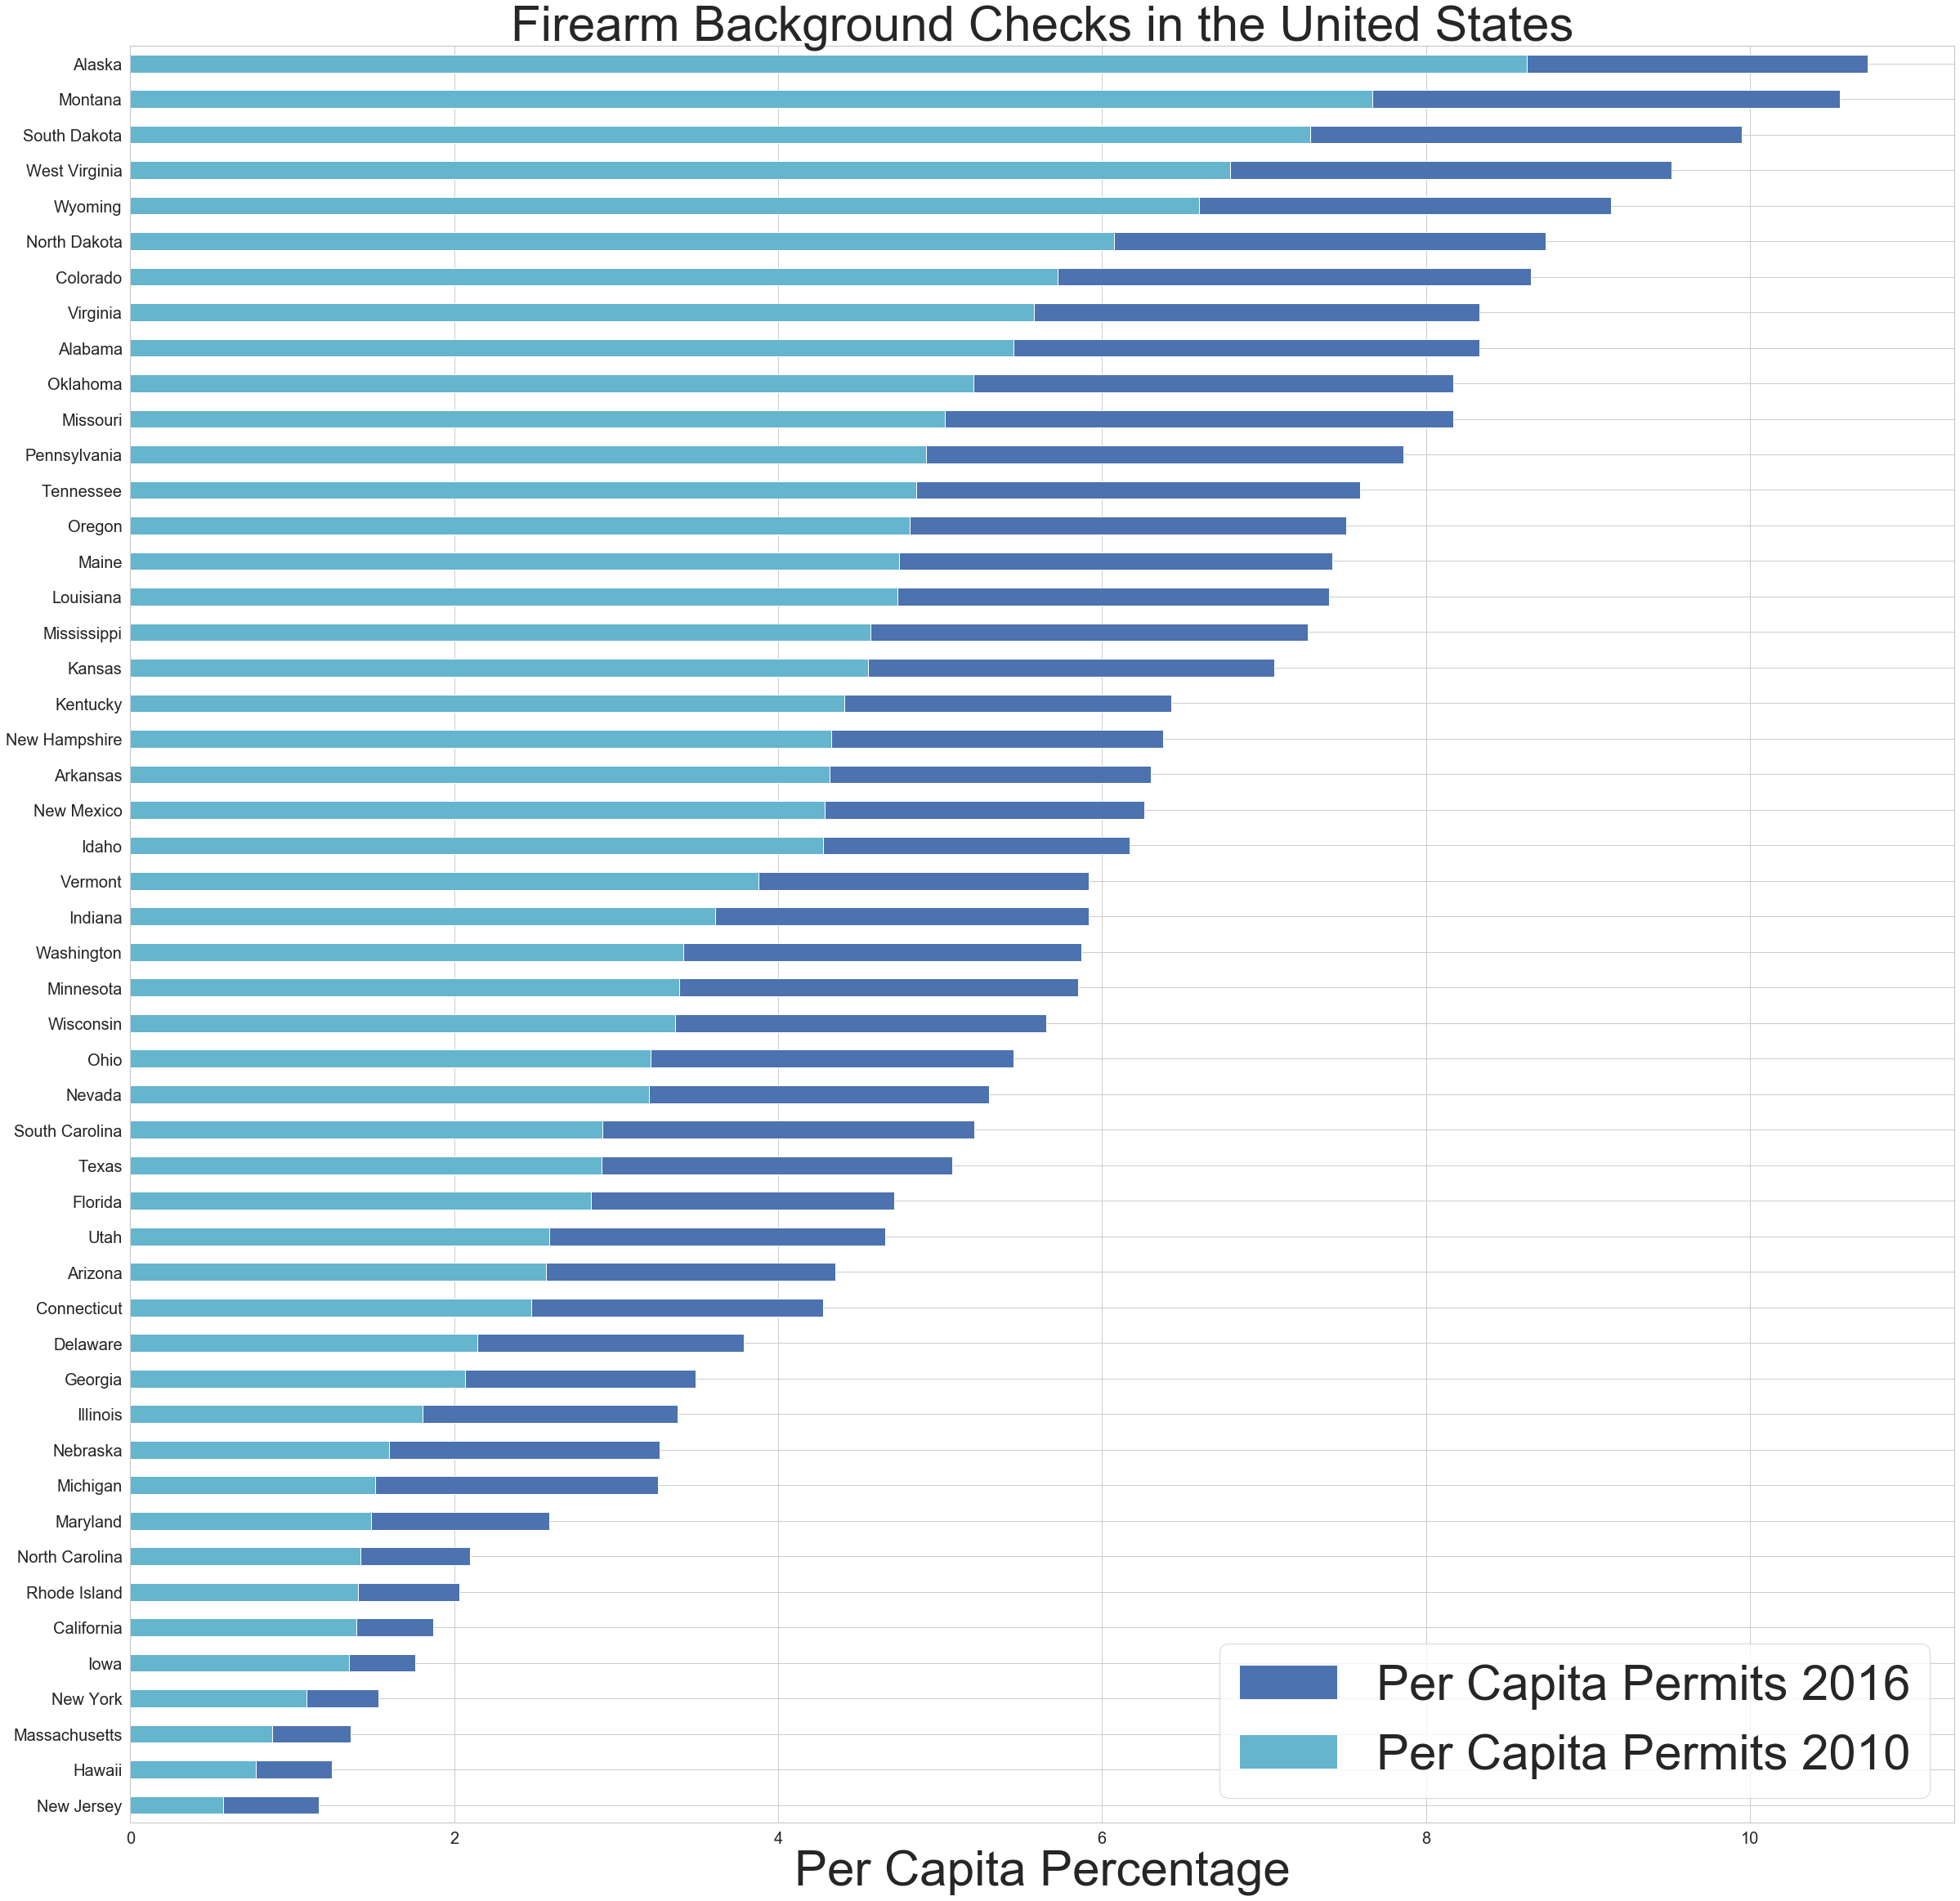

In [259]:
#Plotting per capita background checks in ascending order
f, ax = plt.subplots(figsize=(40, 40))
sns.set(style="whitegrid")

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

per_capita_2016 = df3.loc[:,'Per Capita Permits 2016'].sort_values(ascending=True,)
per_capita_2010 = df3.loc[:,'Per Capita Permits 2010'].sort_values(ascending=True,)
per_capita_2016.plot(kind='barh', color='b')
per_capita_2010.plot(kind='barh', color = 'c')

plt.legend(prop={'size': 60})

ax.set_xlabel('Per Capita Percentage', fontsize=60)
ax.set_title('Firearm Background Checks in the United States', fontsize=60)



Text(0.5, 1.0, 'Firearm Background Check Growth Rate in the United States, 2010 to 2016')

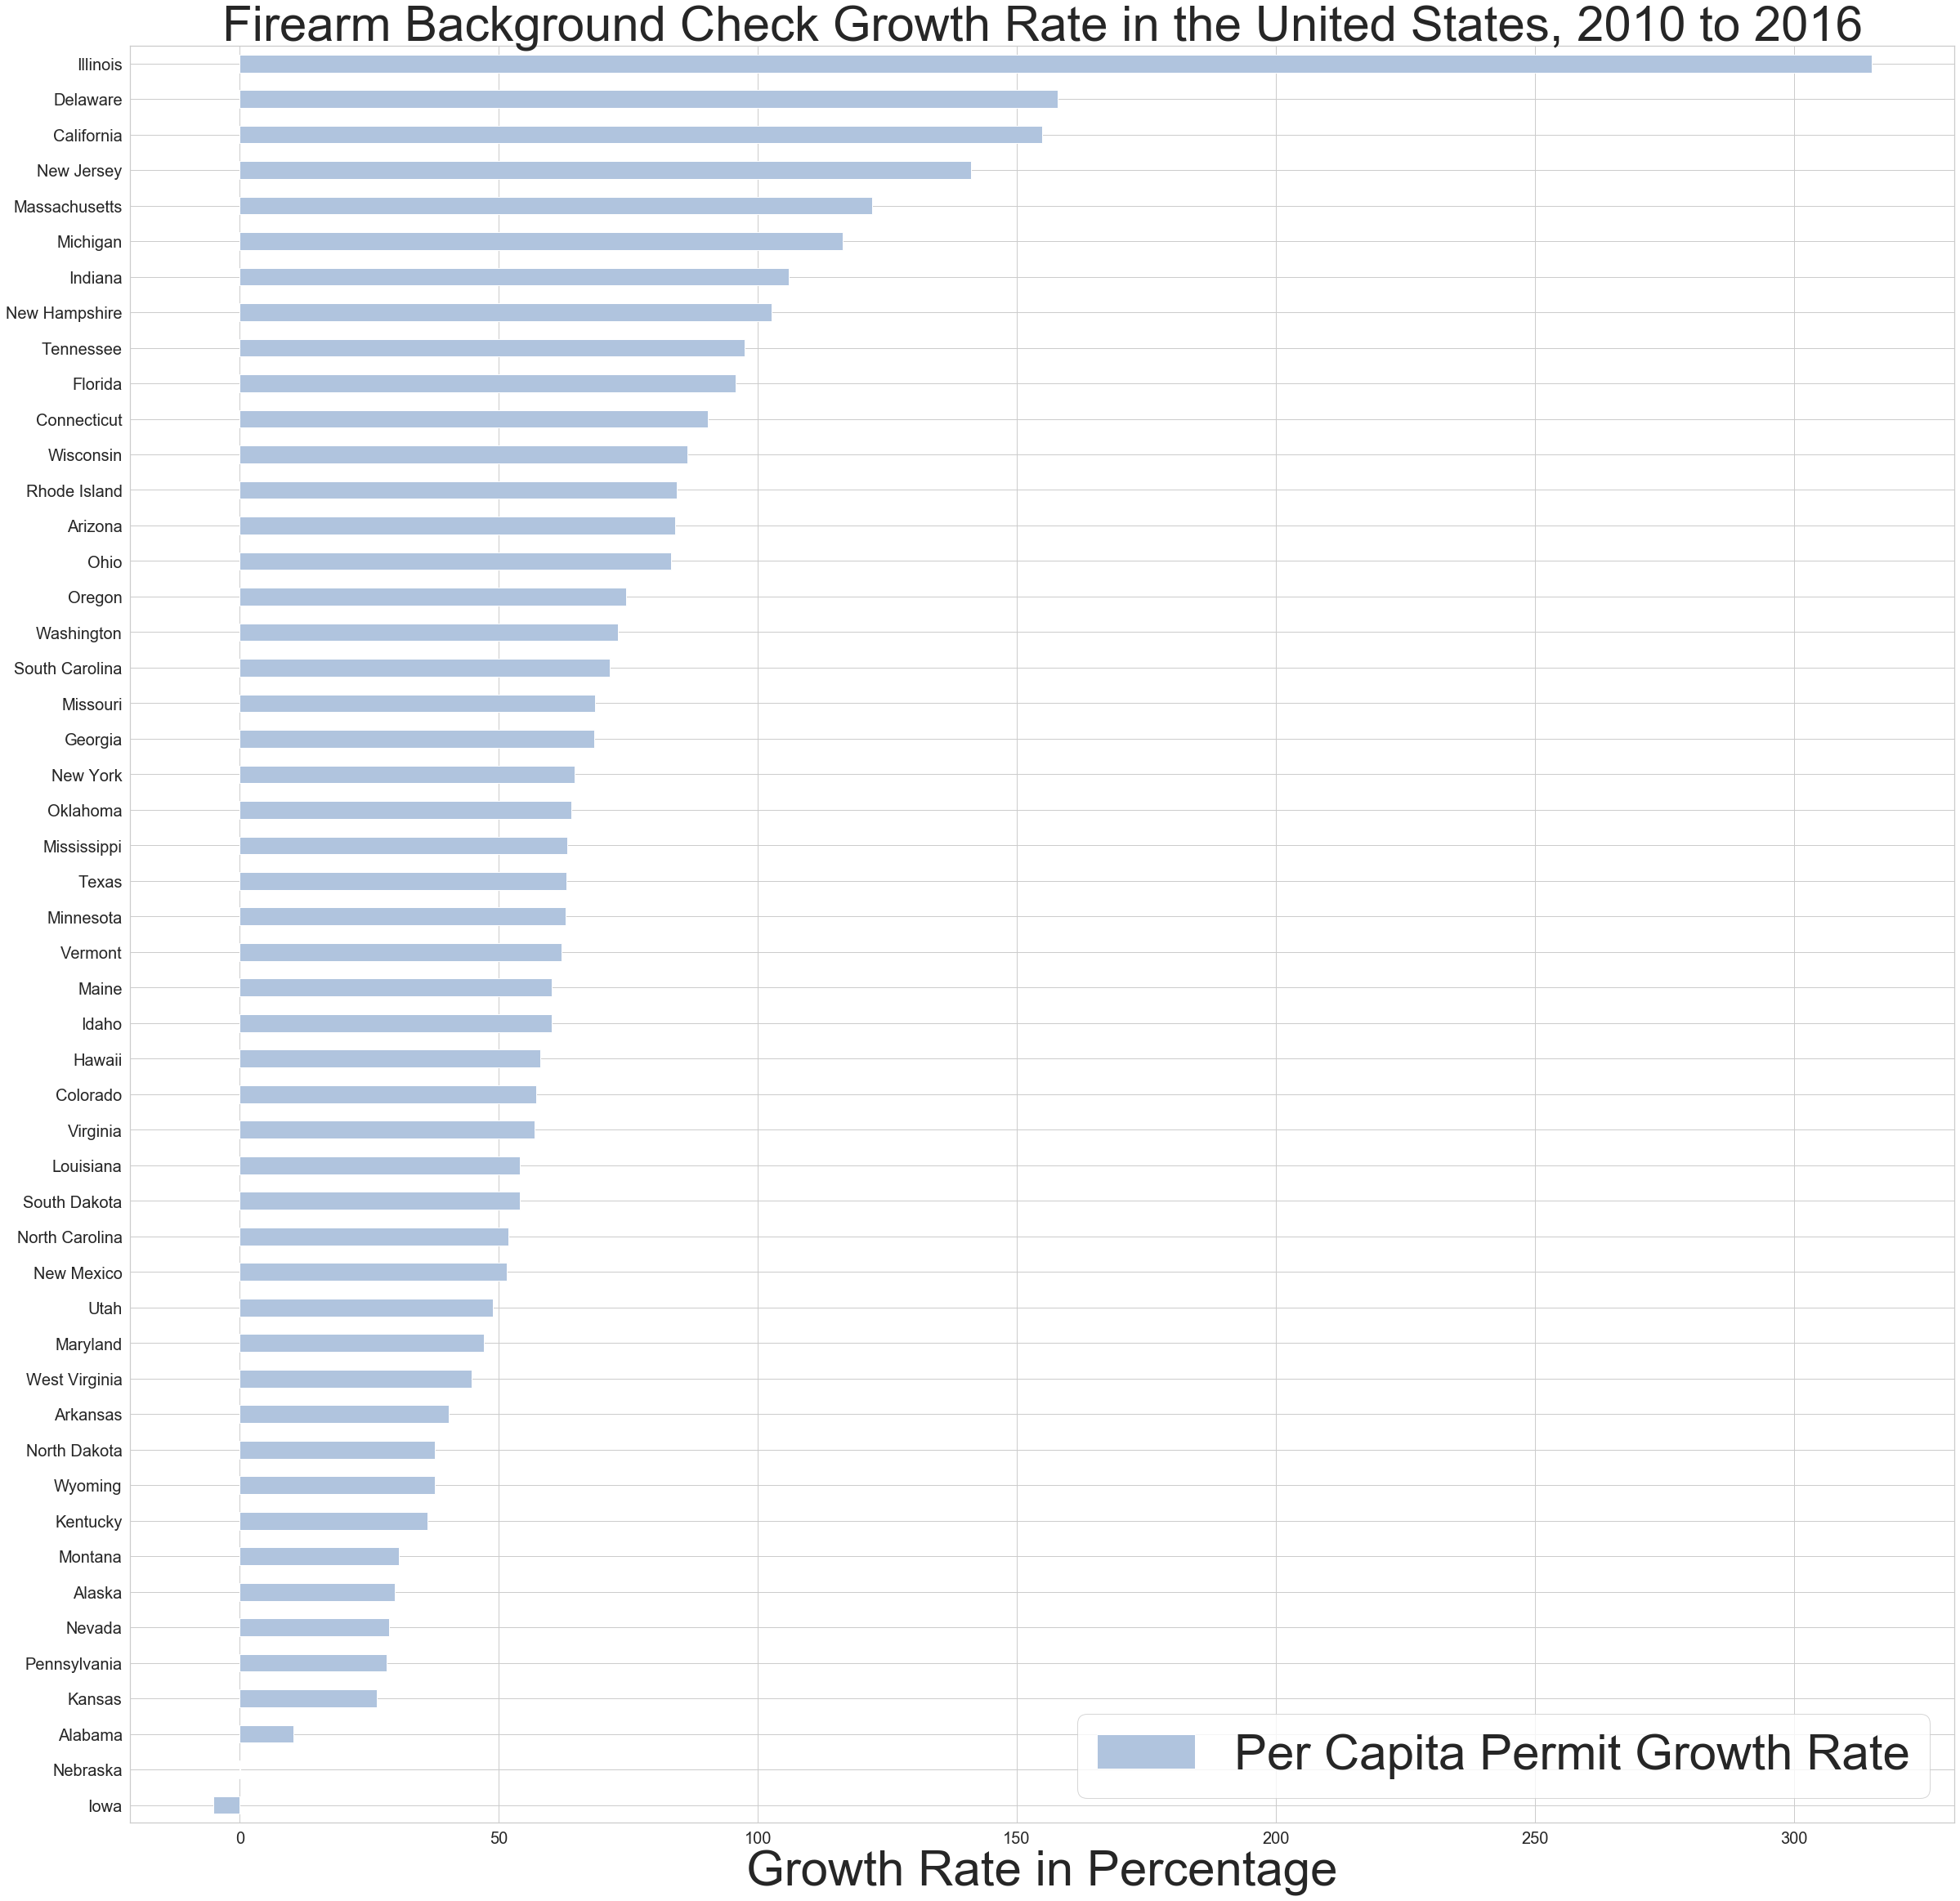

In [260]:
#Plotting per capita background checks in ascending order
f, ax = plt.subplots(figsize=(40, 40))
sns.set(style="whitegrid")

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

per_capita_growth = df3.loc[:,'Per Capita Permit Growth Rate'].sort_values(ascending=True,)
per_capita_growth.plot(kind='barh', color='lightsteelblue')


plt.legend(prop={'size': 60})

ax.set_xlabel('Growth Rate in Percentage', fontsize=60)
ax.set_title('Firearm Background Check Growth Rate in the United States, 2010 to 2016', fontsize=60)

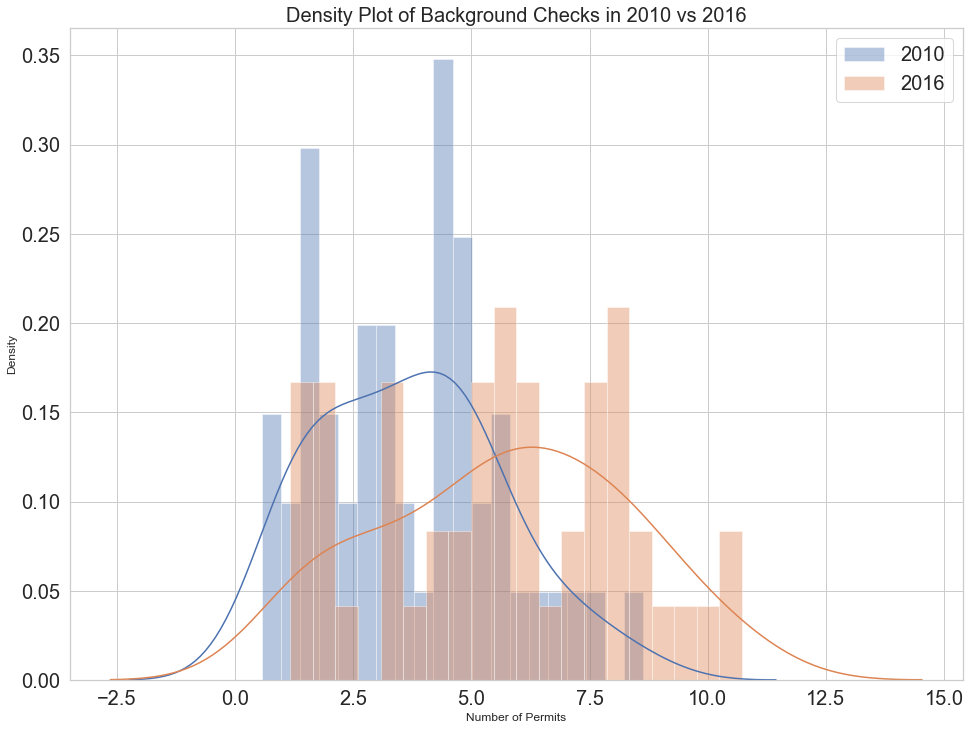

In [261]:

plt.figure(figsize=(16, 12))
sns.distplot(per_capita_2010, label='2010', bins=20)
sns.distplot(per_capita_2016, label = '2016', bins=20)

plt.xlabel('Number of Permits')
plt.ylabel('Density')
plt.title('Density Plot of Background Checks in 2010 vs 2016', fontsize=20)
plt.legend(fontsize=20)
plt.show()




<a id='conclusion'></a>
# Conclusion

The data suggests the following: 
<ul>
<li>The state with the highest per capita background checks in both 2010 and 2016 was Alaska.  The amount of background checks total 10.72 percent of the state population in 2016, and 8.62 percent in 2010. This could be attributed to: The low population of the state (estimated 741,894 in 2016), and a <a href="https://en.wikipedia.org/wiki/Hunting_and_fishing_in_Alaska">robust hunting culture.</a></li>
<br>
<li>The state with the lowest per capita background checks in 2016 was Hawaii, with just 10,527 total checks. This could be attributed to <a href="https://en.wikipedia.org/wiki/Gun_laws_in_Hawaii">Hawaii's gun laws are among the most restrictive in the United States.</a>  The state requires a state permit to purchase a weapon, firearm registration with the county police within ten days, as well as a ban on NFA Firearms including machine guns, short barreled rifles, short barreled shotguns. See the <a href="https://en.wikipedia.org/wiki/National_Firearms_Act">National Firearms Act.</a></li>
<br>
<li>
    The state with the lowest per capita background checks in 2010 was New Jersey, with a total equalling .57% of the state population. Like Hawaii, it's <a href"https://en.wikipedia.org/wiki/Gun_laws_in_New_Jersey">gun laws are among the most restrictive in the United States.</a>Regulations include an assault weapons ban, magazine capacity restrictions, and a state permit requirement. Additionally, only one handgun can be purchased within a 30-day period.</li>
    <br>
    
<li> The state with the largest growth in background checks from 2010 to 2016 was Illinois, with a growth rate just under 315%. This could be related to changes in gun legislation that took affect after 2010, including a Supreme Court case which ruled the ban on handguns in Chicago and Oak Park to be unconstitutional. Additionally, in 2013 repealed the law requiring the registration of firearms and the law requiring a city issued firearm owners permit. For more information see: <a href="https://www.nytimes.com/2010/06/29/us/29scotus.html">Justices Extend Firearm Rights in 5-to-4 Ruling</a> (The New York Times, June 28, 2010) and <a href="https://www.nytimes.com/2013/09/12/us/chicago-city-council-reluctantly-ends-gun-registry.html">Chicago City Council Reluctantly Ends Gun Registry</a> (The New York Times, Sept. 11, 2013)
    
Based on these findings, the data does suggest that stronger firearm laws result in fewer firearm background checks.
